Using TensorFlow backend.


Columns before removal: 
Col. 0 : TIT139.PV - Gas side inlet temperature
Col. 1 : TIC205.PV - Gas side outlet temperature
Col. 2 : FI125B.PV - Gas side flow
Col. 3 : PT140.PV - Gas side compressor pressure
Col. 4 : TT069.PV - Cooling side inlet temperature
Col. 5 : PT074.PV - Cooling side pressure
Col. 6 : TIC205.OUT - Cooling side vavle opening
Col. 7 : ZT127.PV - Anti-surge unknown

Columns after removal: 
Col. 0 : TIT139.PV - Gas side inlet temperature
Col. 1 : TIC205.PV - Gas side outlet temperature
Col. 2 : FI125B.PV - Gas side flow
Col. 3 : PT140.PV - Gas side compressor pressure
Col. 4 : TT069.PV - Cooling side inlet temperature
Col. 5 : PT074.PV - Cooling side pressure
Col. 6 : TIC205.OUT - Cooling side vavle opening
Col. 7 : ZT127.PV - Anti-surge unknown

Finding data between 2016-07-01 00:00:00 and 2016-10-06 00:00:00
Found 11130 rows

Finding data between 2016-01-01 00:00:00 and 2020-03-01 00:00:00
Found 202890 rows

Model mlpd 1x 128 was loaded from file
Model lstmr 1x 128 

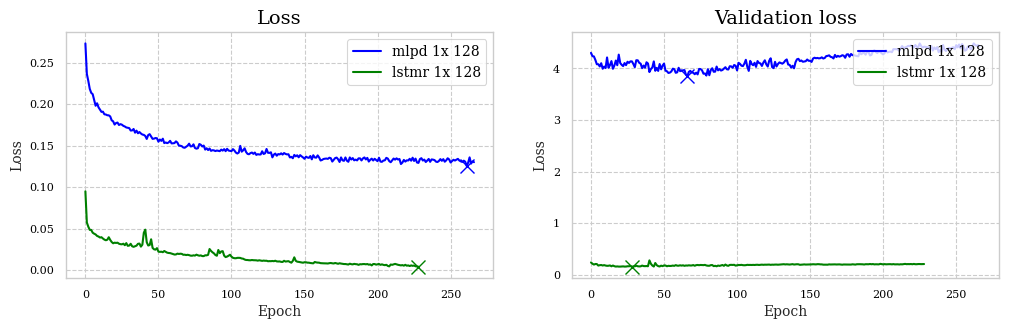

Model prediction scores
+--------------+-------------+------------+
|    Model     | Train score | Test score |
+--------------+-------------+------------+
| mlpd 1x 128  |    0.1237   |  -0.9927   |
| lstmr 1x 128 |    0.8614   |  -0.6231   |
|   linear r   |    0.3532   |  -1.0184   |
+--------------+-------------+------------+


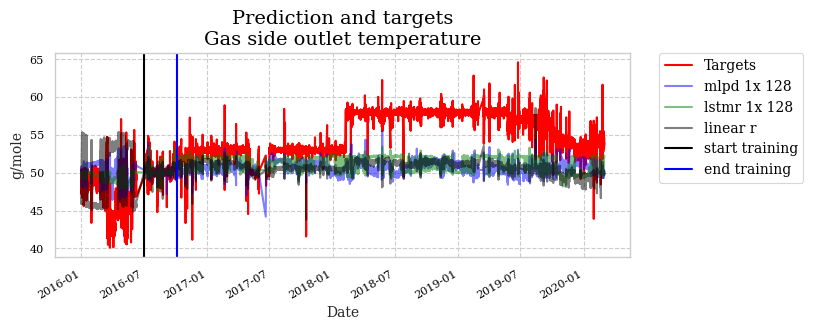

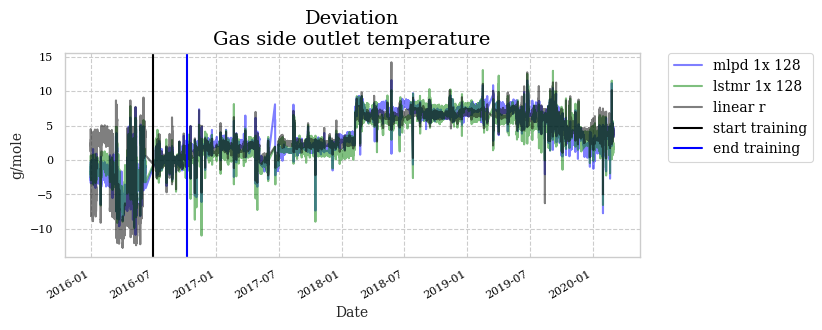

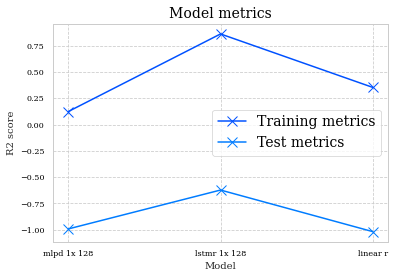

In [2]:
# %load example_dataset_A.py
import statApi
from api import Api
mlApi = Api()

# define dataset specifics
filename = "../master-thesis-db/datasets/A/data_0min.csv"

columns = [
	['TIT139.PV', 'Gas side inlet temperature', 'MSm^3/d'],
	['TIC205.PV', 'Gas side outlet temperature','g/mole'],
	['FI125B.PV', 'Gas side flow', 'degrees'],
	['PT140.PV', 'Gas side compressor pressure', 'degrees'],
	['TT069.PV', 'Cooling side inlet temperature', 'degrees'],
	['PT074.PV', 'Cooling side pressure', 'degrees'],
	['TIC205.OUT', 'Cooling side vavle opening', 'degrees'],
	['XV127.CMD', 'Anti-surge compressor valve', 'degrees'],
	['XV127.ZSH', 'Anti-surge valve', 'degrees'],
	['ZT127.PV', 'Anti-surge unknown', 'Bar'],
]

irrelevantColumns = [
		'XV127.CMD',
		'XV127.ZSH',
]

targetColumns = [
    'TIC205.PV',
]

traintime = [
        ["2016-07-01 00:00:00", "2016-10-06 00:00:00"],
]
	
testtime = [
        "2016-01-01 00:00:00",
		"2020-03-01 00:00:00",
	]

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

mlpd_1x_128 = mlApi.MLP('mlpd 1x 128', layers=[128], dropout=0.2)
lstmd_1x_128 = mlApi.LSTM('lstmr 1x 128', layers=[128], dropout=0.2, recurrentDropout=0.2)

linear = mlApi.Linear('linear')
linear_r = mlApi.Linear_Regularized('linear r')

modelList = [
	mlpd_1x_128,
	lstmd_1x_128,
	#linear,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)